<a href="https://colab.research.google.com/github/HerbGlrt/BTC-Statistic-Analysis/blob/Mojang/Estatistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando bibliotecas e definindo o Dataframe:

In [ ]:
#Installs
!pip install openpyxl matplotlib seaborn
!pip install openpyxl

#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Carregando a planilha
df = pd.read_excel('BTC_BD.xlsx')

# Exibir as primeiras linhas para verificar o carregamento correto
print(df.head())

        Date  Months_Since_Halving          Open          High           Low  \
0 2024-05-01                     1  60609.496094  60780.500000  56555.292969   
1 2024-04-01                     0  71333.484375  72715.359375  59120.066406   
2 2024-03-01                    47  61168.062500  73750.070313  59323.910156   
3 2024-02-01                    46  42569.761719  63913.132813  41879.191406   
4 2024-01-01                    45  42280.234375  48969.371094  38521.894531   

          Close Fechamento        VIX  
0  59123.433594      Queda  14.520000  
1  60636.855469      Queda  16.137727  
2  71333.648438       Alta  13.787500  
3  61198.382813       Alta  13.980476  
4  42582.605469       Alta  13.388636  


# Medidas de posição:


In [ ]:
# Função para calcular as medidas de posição, ignorando médias e medianas para variáveis qualitativas
def calcular_medidas(df, colunas_qualitativas):
    medidas = []
    for coluna in df.columns:
        if coluna in colunas_qualitativas:
            moda = df[coluna].mode().iloc[0]
            medidas.append([coluna, moda, '-', '-', '-', '-'])
        else:
            moda = df[coluna].mode().iloc[0]
            media = df[coluna].mean().round(2)
            q1 = df[coluna].quantile(0.25).round(2)
            mediana = df[coluna].median().round(2)
            q3 = df[coluna].quantile(0.75).round(2)
            medidas.append([coluna, moda, media, q1, mediana, q3])
    return pd.DataFrame(medidas, columns=['Campo', 'Moda', 'Média', 'Q1', 'Mediana(Q2)', 'Q3'])

# Selecionar as colunas de interesse
colunas_interesse = ['Open', 'High', 'Low', 'Close', 'Fechamento', 'VIX']
colunas_qualitativas = ['Fechamento']

# Calcular e exibir as medidas
medidas = calcular_medidas(df[colunas_interesse], colunas_qualitativas)

# Exibir a tabela de medidas
display(medidas)

,Campo,Moda,Média,Q1,Mediana(Q2),Q3
0,Open,0.1,11361.94,230.24,2390.47,15938.99
1,High,0.2,13357.28,265.71,2958.02,20004.07
2,Low,0.0,9835.0,202.1,2027.99,15010.08
3,Close,4.9,11720.73,231.66,2678.09,17013.3
4,Fechamento,Alta,-,-,-,-
5,VIX,10.2645,18.22,13.97,16.71,20.64


#Medidas de dispersão:

In [ ]:
# Calcular as medidas de dispersão
def calcular_medidas_dispersao(df):
    dispersao = pd.DataFrame()
    dispersao['Amplitude'] = (df.max() - df.min()).round(2)
    dispersao['Intervalo Interquartil (IQR)'] = (df.quantile(0.75) - df.quantile(0.25)).round(2)
    dispersao['Variância'] = df.var().round(2)
    dispersao['Desvio Padrão'] = df.std().round(2)
    dispersao['Coeficiente de Variação (%)'] = (df.std() / df.mean() * 100).round(2)
    return pd.DataFrame(dispersao, columns=['Amplitude', 'Intervalo Interquartil (IQR)', 'Variância', 'Desvio Padrão', 'Coeficiente de Variação (%)'])

# Selecionar as colunas de interesse
colunas_interesse = ['Open', 'High', 'Low', 'Close', 'VIX']

# Calcular e exibir as medidas de dispersão
medidas_dispersao = calcular_medidas_dispersao(df[colunas_interesse])

# Renomear o índice para "Campo"
medidas_dispersao.index.name = "Campo"

# Exibir a tabela de medidas de dispersão
display(medidas_dispersao)


,Amplitude,Intervalo Interquartil (IQR),Variância,Desvio Padrão,Coeficiente de Variação (%)
Campo,,,,,
Open,71333.38,15708.75,2.796024e+08,16721.32,147.17
High,73749.97,19738.36,3.736445e+08,19329.89,144.71
Low,59323.91,14807.97,2.101791e+08,14497.56,147.41
Close,71333.55,16781.64,2.927083e+08,17108.72,145.97
VIX,47.61,6.67,4.161000e+01,6.45,35.40


# Medidas de frequência:

Frequência da variável qualitativa (Fechamento):


,Frequência
Categoria,
Alta,99
Queda,67


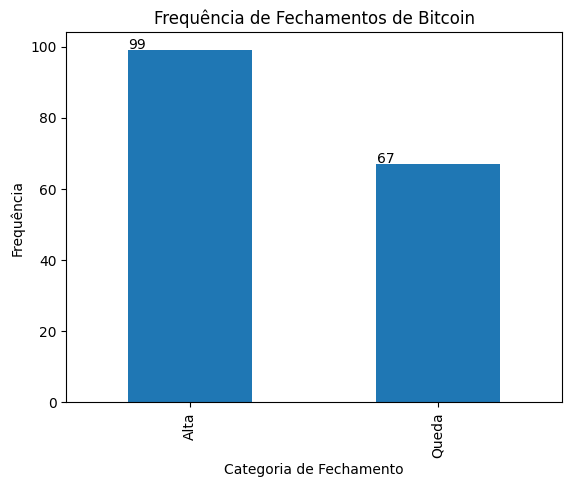


Frequência da variável quantitativa (Close):


,Frequência
Intervalo de Fechamento,
"(-71.234, 7133.455]",99
"(7133.455, 14266.81]",24
"(28533.519, 35666.874]",8
"(14266.81, 21400.165]",7
"(21400.165, 28533.519]",7
"(35666.874, 42800.229]",7
"(42800.229, 49933.584]",6
"(57066.939, 64200.294]",6
"(49933.584, 57066.939]",1


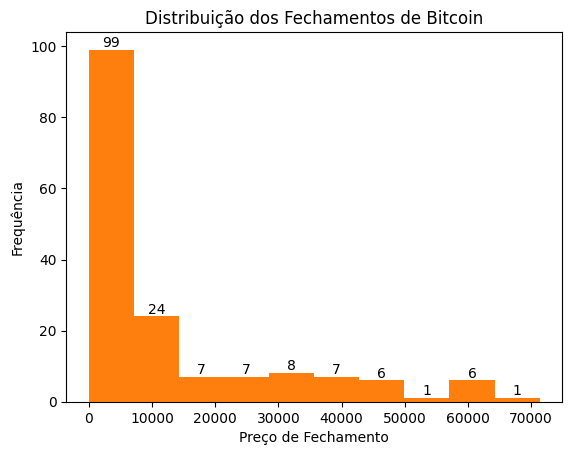

In [ ]:
# Renomear categorias 'Fechamento'
df['Fechamento'] = df['Fechamento'].replace({0: 'Queda', 1: 'Alta'})

# Calcular a frequência das categorias da variável qualitativa 'Fechamento'
freq_qualitative = df['Fechamento'].value_counts().reset_index()
freq_qualitative.columns = ['Categoria', 'Frequência']
freq_qualitative = freq_qualitative.set_index('Categoria')

# Exibir a tabela de frequência da variável qualitativa
print("Frequência da variável qualitativa (Fechamento):")
display(pd.DataFrame(freq_qualitative))

# Gráfico de barras para a variável qualitativa
ax1 = freq_qualitative.plot(kind='bar', legend=False)
plt.title('Frequência de Fechamentos de Bitcoin')
plt.xlabel('Categoria de Fechamento')
plt.ylabel('Frequência')

# Adicionar rótulos nas colunas
for p in ax1.patches:
    ax1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

# Calcular a frequência dos valores da variável quantitativa 'Close'
freq_quantitative = pd.cut(df['Close'], bins=10).value_counts().reset_index()
freq_quantitative.columns = ['Intervalo de Fechamento', 'Frequência']
freq_quantitative = freq_quantitative.set_index('Intervalo de Fechamento')

# Exibir a tabela de frequência da variável quantitativa
print("\nFrequência da variável quantitativa (Close):")
display(pd.DataFrame(freq_quantitative))

# Histograma para a variável quantitativa
ax2 = df['Close'].plot(kind='hist', bins=10)
plt.title('Distribuição dos Fechamentos de Bitcoin')
plt.xlabel('Preço de Fechamento')
plt.ylabel('Frequência')

# Adicionar rótulos nas colunas
n, bins, patches = ax2.hist(df['Close'], bins=10)
for i in range(len(patches)):
    ax2.annotate(str(int(n[i])), (patches[i].get_x() + patches[i].get_width() / 2, n[i]),
                 ha='center', va='bottom')

plt.show()


# Histogramas:

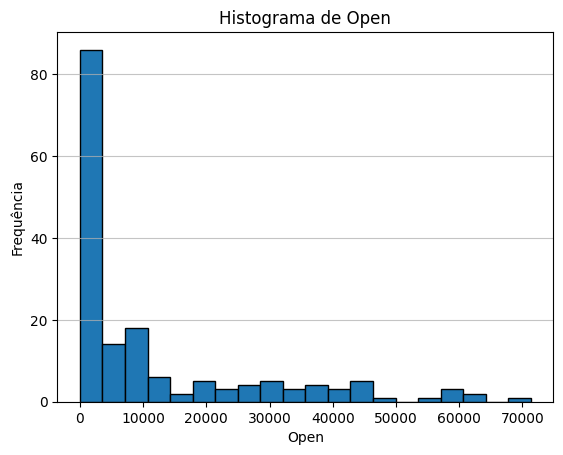

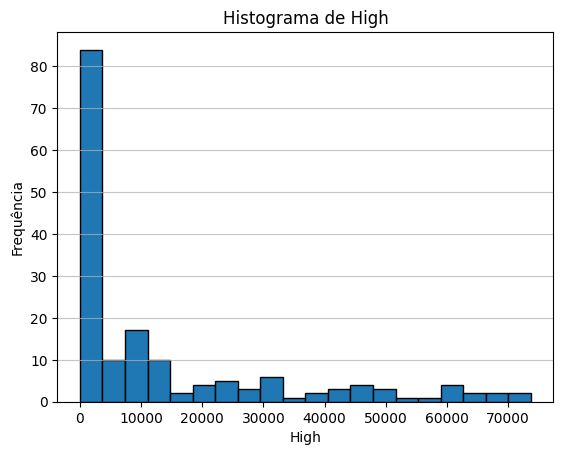

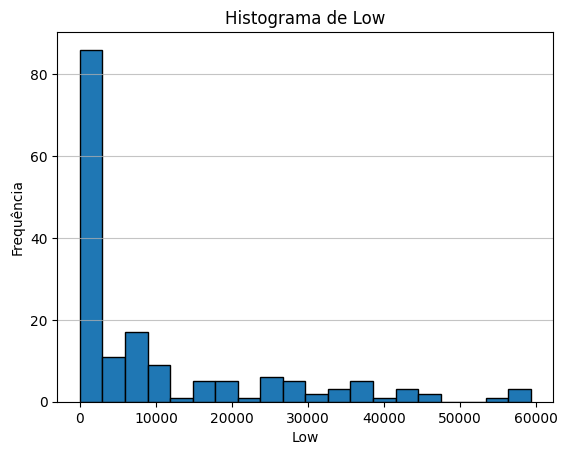

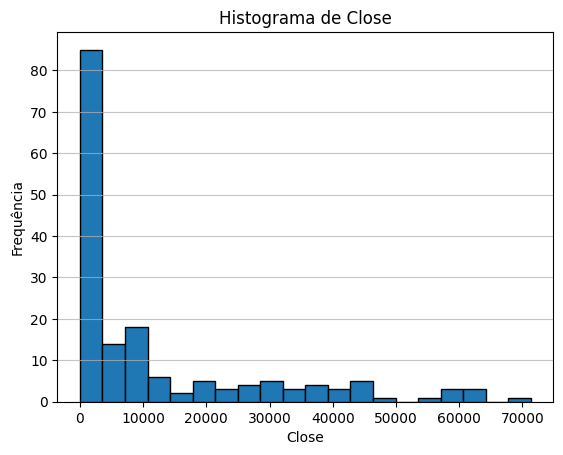

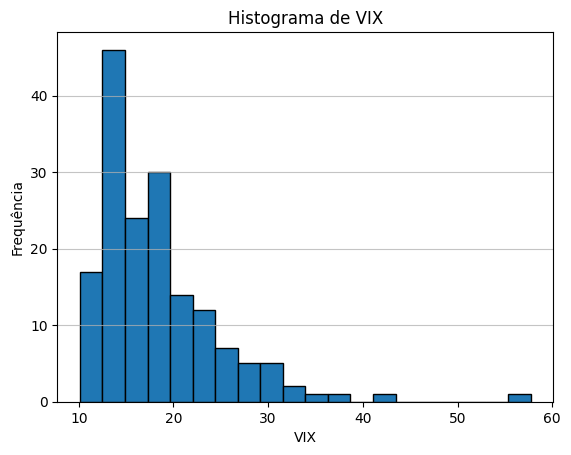

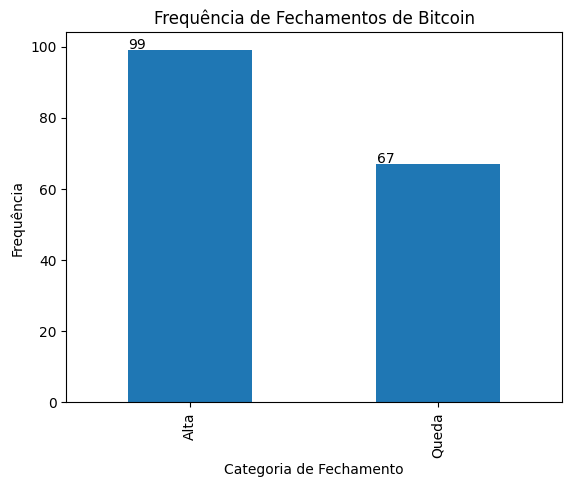

In [ ]:
# Criar histogramas para cada coluna quantitativa
for column in colunas_interesse:
    plt.figure()
    df[column].plot(kind='hist', bins=20, edgecolor='black')
    plt.title(f'Histograma de {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')
    plt.grid(axis='y', alpha=0.75)
    # Salvar cada figura como uma imagem separada
    plt.savefig(f'{column}_histogram.png')
    plt.show()

# Gráfico de barras para a variável qualitativa
freq_qualitative.plot(kind='bar', legend=False)
plt.title('Frequência de Fechamentos de Bitcoin')
plt.xlabel('Categoria de Fechamento')
plt.ylabel('Frequência')

# Adicionar rótulos nas colunas
for p in plt.gca().patches:
    plt.gca().annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))


# Salvar figura como uma imagem separada
plt.savefig('frequencia_fechamento.png')

plt.show()

# Boxplot:

           Q1  Q2 (Mediana)        Q3
Open   230.24       2390.47  15938.99
High   265.71       2958.02  20004.07
Low    202.10       2027.99  15010.08
Close  231.66       2678.09  17013.30
VIX     13.97         16.71     20.64


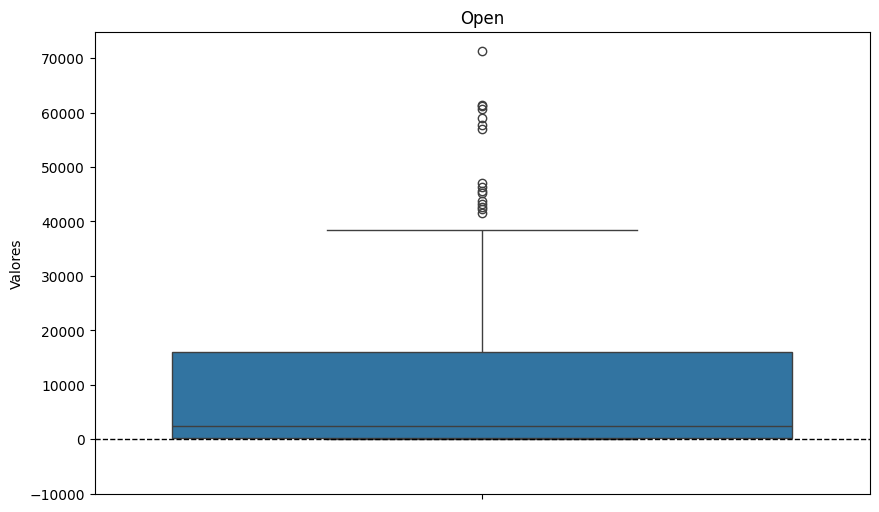

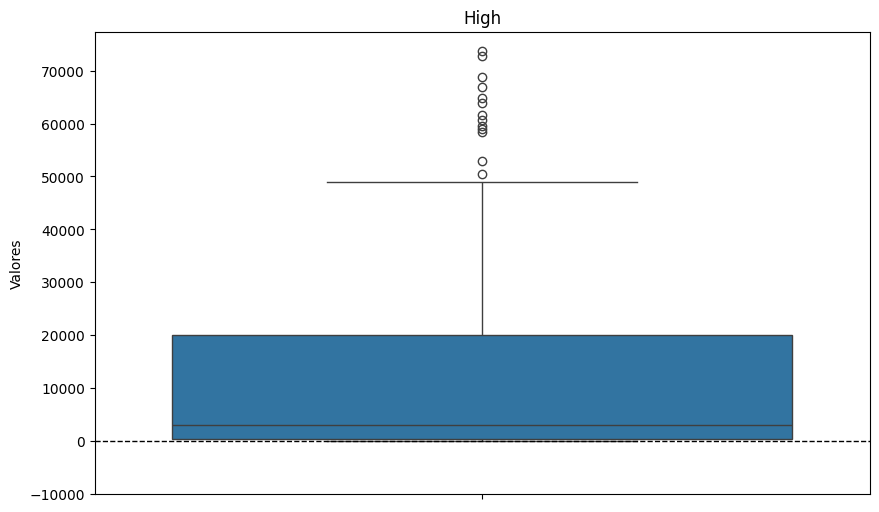

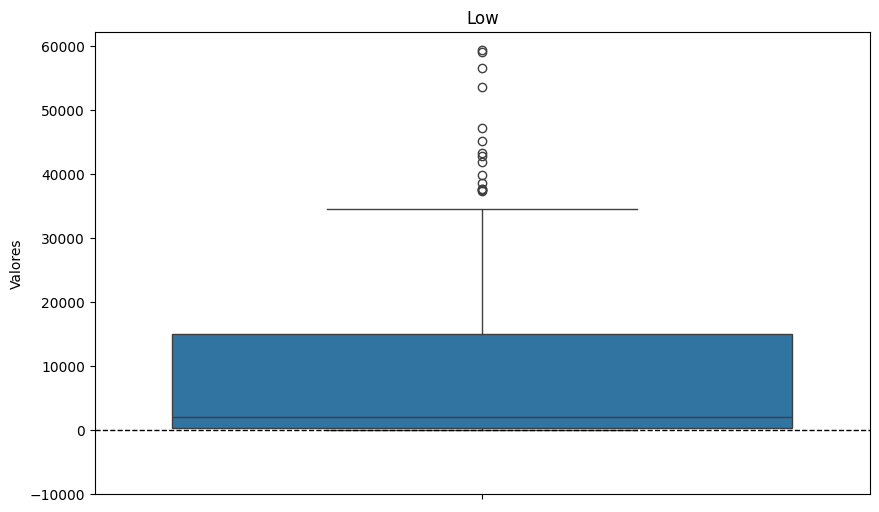

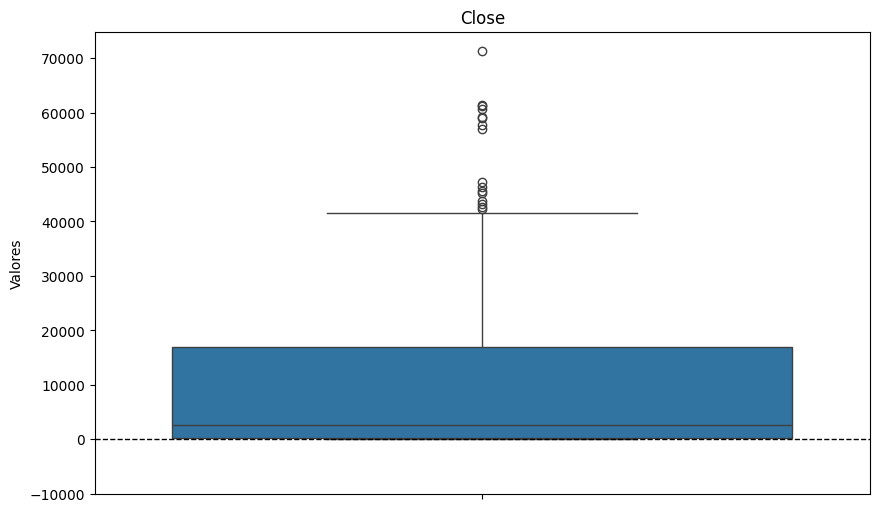

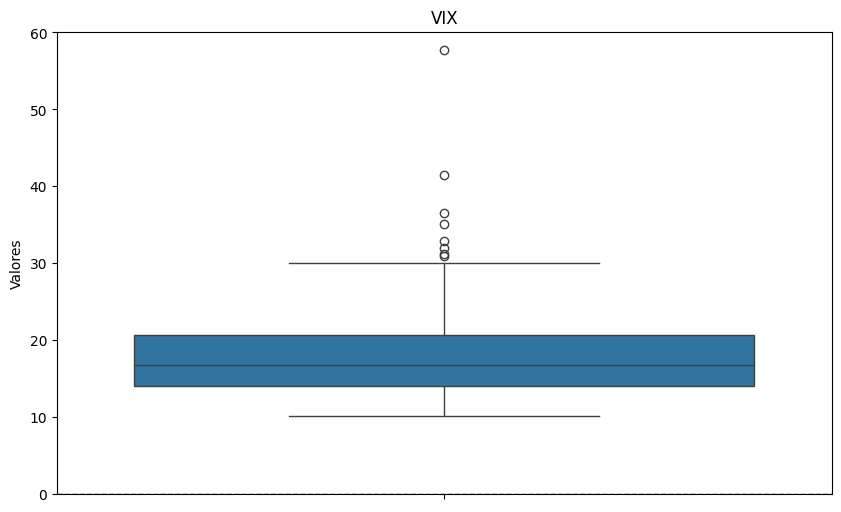

In [ ]:
# Calcular os quartis
def calcular_quartis(df):
    quartis = pd.DataFrame()
    quartis['Q1'] = df.quantile(0.25).round(2)
    quartis['Q2 (Mediana)'] = df.quantile(0.50).round(2)
    quartis['Q3'] = df.quantile(0.75).round(2)
    return quartis

# Selecionar as colunas de interesse
colunas_interesse = ['Open', 'High', 'Low', 'Close', 'VIX']

# Calcular e exibir os quartis
quartis = calcular_quartis(df[colunas_interesse])
print(quartis)

# Gerar boxplots separados com ajustes solicitados
def ajustar_limites_eixos(coluna):
    if coluna == 'VIX':
        return (0, None)
    elif coluna in ['Open', 'High', 'Low', 'Close']:
        return (-10000, None)
    return (None, None)

for coluna in colunas_interesse:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=df[coluna])
    plt.title(coluna)
    plt.ylabel('Valores')
    # Ajustar os limites do eixo y
    plt.ylim(ajustar_limites_eixos(coluna))
    # Adicionar uma linha pontilhada no nível 0 do eixo y
    plt.axhline(y=0, color='black', linestyle='--', linewidth=1)
    # Salvar cada figura como uma imagem separada
    plt.savefig(f'{coluna}_boxplot.png')
    plt.show()

# Análise Bivariada quantitativa:

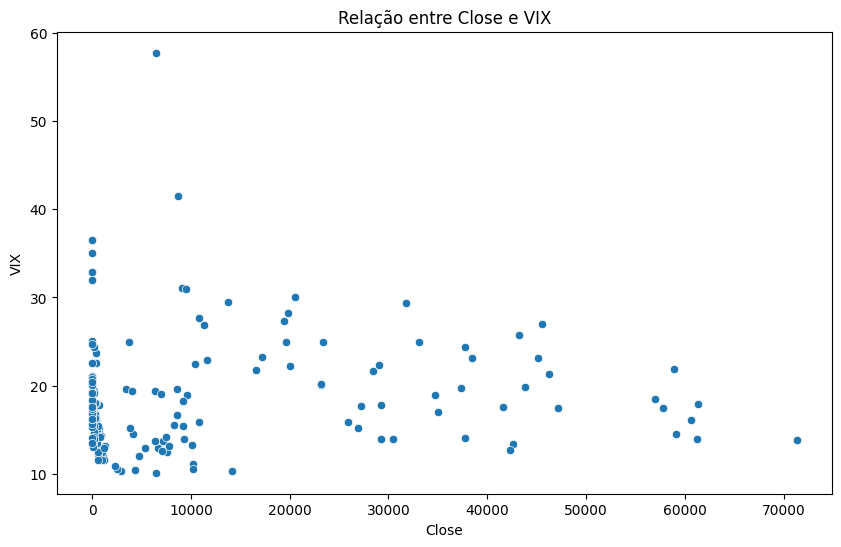

In [20]:
# Convertendo as colunas para o tipo correto
df['Close'] = pd.to_numeric(df['Close'], errors='coerce')
df['VIX'] = pd.to_numeric(df['VIX'], errors='coerce')

# Removendo linhas com valores NaN
df = df.dropna(subset=['Close', 'VIX'])

# Criando o diagrama de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Close', y='VIX', data=df)

# Adicionando título e labels
plt.title('Relação entre Close e VIX')
plt.xlabel('Close')
plt.ylabel('VIX')

# Salvar figura como uma imagem separada
plt.savefig('bivariada.png')

# Exibindo o gráfico
plt.show()

#Medidas Resumo e representação gráfica da relação Close x Fechamento

In [32]:
# Converter a variável qualitativa 'Fechamento' em uma variável numérica
df['Fechamento_Num'] = df['Fechamento'].apply(lambda x: 1 if x == 'Alta' else 0)

# Calcular o coeficiente de correlação de Pearson entre 'VIX' e 'Fechamento_Num'
correlation = df['VIX'].corr(df['Fechamento_Num'])
print(f'Coeficiente de correlação entre VIX e Fechamento: {correlation}')

Coeficiente de correlação entre VIX e Fechamento: -0.1437108115317114


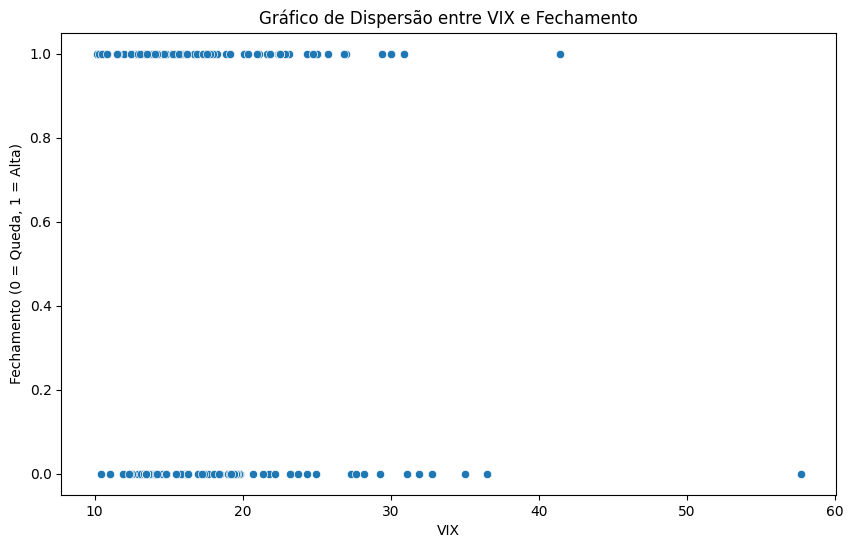

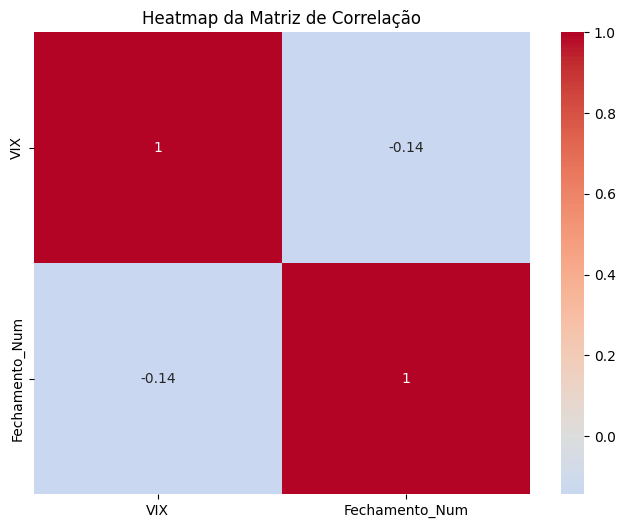

In [34]:
# Gráfico de dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x='VIX', y='Fechamento_Num', data=df)
plt.title('Gráfico de Dispersão entre VIX e Fechamento')
plt.xlabel('VIX')
plt.ylabel('Fechamento (0 = Queda, 1 = Alta)')
plt.show()

# Matriz de correlação
correlation_matrix = df[['VIX', 'Fechamento_Num']].corr()

# Heatmap da matriz de correlação
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap da Matriz de Correlação')
plt.show()